In [27]:
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_formats = ['svg']
import numpy as np

,t,Tprog,Ts,W
0,300.0,30.004,29.548,1.273378
1,300.2,30.033,29.547,1.273545
2,300.4,30.067,29.547,1.273545
3,300.6,30.100,29.546,1.273378
4,300.8,30.133,29.546,1.273545
...,...,...,...,...
20095,4319.0,699.833,701.028,0.140690
20096,4319.2,699.867,701.064,0.140523
20097,4319.4,699.900,701.101,0.140690
20098,4319.6,699.933,701.137,0.140523


,t,Tprog,Ts,W
0,300.0,30.004,30.860,0.001543
1,300.2,30.037,30.860,0.001364
2,300.4,30.071,30.859,0.001364
3,300.6,30.104,30.858,0.001364
4,300.8,30.137,30.858,0.001364
...,...,...,...,...
20095,4319.0,699.837,696.309,0.012452
20096,4319.2,699.871,696.344,0.012284
20097,4319.4,699.904,696.378,0.012117
20098,4319.6,699.937,696.412,0.012117


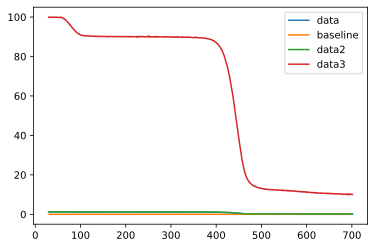

In [28]:
main = pd.read_csv("TGA_N15.dat", sep="\s+", usecols=[0, 1, 2, 3],
                      names=["t", "Tprog", "Ts", "W"])
display(main)

baseline = pd.read_csv("baseline(30-700).dat", sep="\s+", usecols=[0, 1, 2, 3],
                      names=["t", "Tprog", "Ts", "W"])
display(baseline)
plt.plot(main["Ts"], main["W"], label="data")
plt.plot(baseline["Ts"], baseline["W"], label="baseline")
# С вычетом базовой линии
data = main
#data["Ts"] -= baseline["Ts"]
data["W"] -= baseline["W"]
plt.plot(data["Ts"], data["W"], label="data2")
data["W"] = data["W"]/np.max(data["W"])*100
plt.plot(data["Ts"], data["W"], label="data3")
plt.legend()
plt.show()

700.13
20070
10.176964046472108


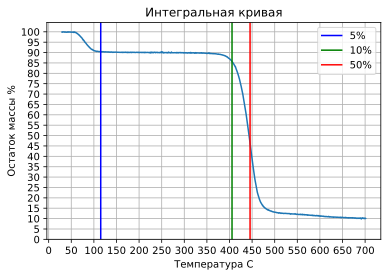

In [29]:
i = 0
while data["Ts"][i] < 700:
    i = i+10
print (data["Ts"][i])
print(i)
print(data["W"][i])


plt.plot(data["Ts"], data["W"])
plt.xlabel("Температура С")
plt.ylabel("Остаток массы %")
plt.grid()
plt.axvline(x = 115.15, color = 'b', label = "5%")
plt.axvline(x = 405.6, color = 'g', label = "10%")
plt.axvline(x = 445.5, color = 'r', label = "50%")
plt.title("Интегральная кривая")
plt.xticks(np.arange(0, max(data["Ts"]), 50))
plt.yticks(np.arange(0, 105, 5))
plt.legend()
plt.show()

In [33]:
i = 0
while data["W"][i] >= 50:
    i = i+10
print (data["Ts"][i])
print(i)
print(data["W"][i])

443.552
12550
49.56508969141629


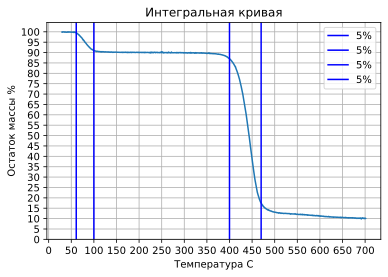

In [9]:
plt.plot(data["Ts"], data["W"])
plt.xlabel("Температура С")
plt.ylabel("Остаток массы %")
plt.grid()
plt.axvline(x = 61, color = 'b', label = "5%")
plt.axvline(x = 100 , color = 'b', label = "5%")
plt.axvline(x = 400, color = 'b', label = "5%")
plt.axvline(x = 470, color = 'b', label = "5%")
plt.title("Интегральная кривая")
plt.xticks(np.arange(0, max(data["Ts"]), 50))
plt.legend()
plt.yticks(np.arange(0, 105, 5))
plt.show()

In [6]:
dif_data = np.diff(data["W"])
plt.title("Дифференциальная кривая")
plt.scatter(data["Ts"][:-1], dif_data, 0.2)
approx_data = []
l = 200
for i in range(len(dif_data)-l):
    approx_data.append(np.mean(dif_data[i:i+l]))
print(len(approx_data))
print(len(dif_data))
plt.plot(data["Ts"][l//2+1:-l//2], approx_data, "r")
plt.grid()
plt.savefig("Diff_curve.png")
plt.show()

19899
20099
